In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read in concatenated csv file and save as a dataframe
final_df_all = pd.read_csv('./data/final_data_0605.csv')
final_df_all.head()

,Unnamed: 0,arr_city,dept_city,leg_id,price,stops,total_time_mins,arr_city_coords,dept_city_coords,distance
0,0,Sydney,San Francisco,d2f755fe00120e929ca74f961c1eab68,857.0,1,998,"(-33.8688197, 151.2092955)","(37.7749295, -122.4194155)",7415.737015
1,1,Sydney,San Francisco,714a5095ae3f54658f21659af126d1cd,936.0,1,1241,"(-33.8688197, 151.2092955)","(37.7749295, -122.4194155)",7415.737015
2,2,Sydney,San Francisco,f65e244378619c6565fee723db6e517b,942.0,1,983,"(-33.8688197, 151.2092955)","(37.7749295, -122.4194155)",7415.737015
3,3,Sydney,San Francisco,5de254db482d07b21fbacd2541d2a761,824.0,1,1258,"(-33.8688197, 151.2092955)","(37.7749295, -122.4194155)",7415.737015
4,4,Sydney,San Francisco,e62412b83aabfeabf1f95214aa7bdcf7,1182.0,1,1335,"(-33.8688197, 151.2092955)","(37.7749295, -122.4194155)",7415.737015


In [3]:
# Define my features as X
X = final_df_all.loc[:, ["price", "stops", "total_time_mins", "distance"]].values
X

array([[8.57000000e+02, 1.00000000e+00, 9.98000000e+02, 7.41573701e+03],
       [9.36000000e+02, 1.00000000e+00, 1.24100000e+03, 7.41573701e+03],
       [9.42000000e+02, 1.00000000e+00, 9.83000000e+02, 7.41573701e+03],
       ...,
       [0.00000000e+00, 2.00000000e+00, 1.44800000e+03, 1.02450219e+04],
       [2.05600000e+03, 2.00000000e+00, 1.41500000e+03, 1.02450219e+04],
       [4.42500000e+03, 2.00000000e+00, 1.40100000e+03, 1.02450219e+04]])

In [4]:
# Set y as my arrival city
y = final_df_all.loc[:, ["arr_city"]].values
y

array([['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['San Francisco'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['San Francisco'],
       ['San Francisco'],
       ['Sydney'],
       ['San Francisco'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['San Francisco'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['San Francisco'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['San Francisco'],
       ['Sydney'],
       ['Sydney'],
       ['San Francisco'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['San Francisco'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['Sydney'],
       ['San Francisco'],
       ['San Francisco'],
       ['Sydney'],
       ['Sy

In [5]:
# Import dependencies
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

/Users/dorispira/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
y

array([10, 10, 10, 10, 10, 10,  9, 10, 10, 10,  9,  9, 10,  9, 10, 10, 10,
       10,  9, 10, 10, 10, 10, 10,  9, 10, 10, 10,  9, 10, 10,  9, 10, 10,
       10, 10, 10, 10, 10,  9, 10, 10, 10, 10, 10,  9,  9, 10, 10, 10, 10,
        9, 10, 10, 10, 10,  9, 10, 10,  9, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10,  9, 10, 10, 10, 10, 10, 10, 10,  8,  9,  8,  9,  8,  8,  8,  9,
        8,  8,  8,  8,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        8,  9,  8,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  8,  9,  8,  8,  8,  8,  9,  9,  3,  9,  3,
        3,  3,  3,  9,  3,  9,  3,  3,  3,  3,  3,  3,  3,  3,  9,  3,  9,
        3,  9,  3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,
        1,  1,  1,  1,  1,  1,  1,  1,  9,  1,  1,  1,  1,  1,  1,  1,  9,
        1,  1,  1,  1,  1

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

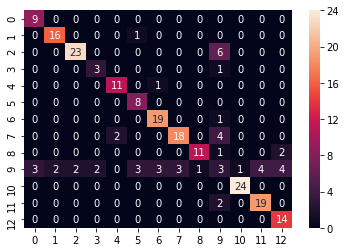

In [32]:
sns.heatmap(cm, annot=True, fmt="d")